In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
sample_sub=pd.read_csv('sample_submission.csv')

In [38]:
label=train_data['label'].values
train_data.drop('label',axis=1,inplace=True)

In [4]:
np_values=train_data.values

In [5]:
np_values.shape

(42000, 784)

In [31]:
img=(np_values[1]).reshape(28,28)

In [32]:
img.shape

(28, 28)

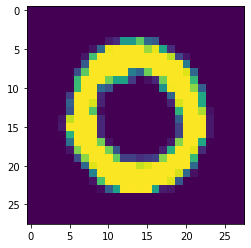

In [33]:
plt.imshow(img)
plt.show()

In [41]:
label=label.values

In [43]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(label.reshape(-1, 1))

In [46]:
in_layer = Input((28, 28, 1))
con1 = Conv2D(16, (3, 3), activation="relu")(in_layer)
p1 = MaxPooling2D()(con1)
con2 = Conv2D(32, (3, 3), activation="relu")(p1)
p2 = MaxPooling2D()(con2)
flat = Flatten()(p2)
d1 = Dense(400, activation="sigmoid", name="chacha")(flat)
d2 = Dense(100, activation="sigmoid", name="mama")(d1)
d3 = Dense(10, activation="softmax", name="taya")(d2)

model=Model(in_layer,d3)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

hist=model.fit(np_values.reshape((-1,28,28,1)),y_hot,epochs=5,batch_size=1000,validation_split=0.25)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 16s 514us/step - loss: 1.2993 - accuracy: 0.7595 - val_loss: 0.5830 - val_accuracy: 0.9226
Epoch 2/5
31500/31500 [==============================] - 13s 410us/step - loss: 0.3699 - accuracy: 0.9419 - val_loss: 0.2215 - val_accuracy: 0.9609
Epoch 3/5
31500/31500 [==============================] - 12s 396us/step - loss: 0.1779 - accuracy: 0.9658 - val_loss: 0.1347 - val_accuracy: 0.9724
Epoch 4/5
31500/31500 [==============================] - 13s 406us/step - loss: 0.1140 - accuracy: 0.9772 - val_loss: 0.1018 - val_accuracy: 0.9779
Epoch 5/5
31500/31500 [==============================] - 12s 385us/step - loss: 0.0831 - accuracy: 0.9834 - val_loss: 0.0796 - val_accuracy: 0.9828


In [48]:
to_predict=test_data.values

In [51]:
prediction=model.predict(to_predict.reshape((-1,28,28,1)))

In [55]:
real_pred=ohe.inverse_transform(prediction)

In [57]:
Real=pd.DataFrame(real_pred)

In [62]:
sample_sub['Label']=Real

In [66]:
sample_sub.to_csv("mysubmission.csv",index=False)

In [69]:
images=to_predict.reshape((-1,28,28,1))

In [70]:
images.shape

(28000, 28, 28, 1)